Load a Dataset

In [25]:
# Load the Data in Python:
import pandas as pd

df = pd.read_csv("Processed_Reviews_labels.csv")  
df.shape

df.head()

df.info()

# Checking for null values
df.isnull().sum()

# Checking Duplicate values
df.duplicated().sum()

# Drop Duplicate values
df = df.drop_duplicates()
df.shape

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Review                 13 non-null     object
 1   lowercased             13 non-null     object
 2   urls_removed           13 non-null     object
 3   html_removed           13 non-null     object
 4   emojis_removed         13 non-null     object
 5   slangs_replaced        13 non-null     object
 6   contractions_replaced  13 non-null     object
 7   punctuations_removed   13 non-null     object
 8   numbers_removed        13 non-null     object
 9   spelling_corrected     13 non-null     object
 10  stopwords_removed      13 non-null     object
 11  stemmed_words          13 non-null     object
 12  lemmatized             13 non-null     object
 13  tokenized              13 non-null     object
 14  label                  13 non-null     int64 
dtypes: int64(1), object(14)
m

,Review,lowercased,urls_removed,html_removed,emojis_removed,slangs_replaced,contractions_replaced,punctuations_removed,numbers_removed,spelling_corrected,stopwords_removed,stemmed_words,lemmatized,tokenized,label
0,The product arrived on time. Packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,product arrived time packaging great quality a...,product arriv time packag great qualiti amaz,product arrive time packaging great quality am...,"['product', 'arrive', 'time', 'packaging', 'gr...",1
1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing i love it,this product is just amazing i love it,this product is just amazing i love it,product amazing love,product amaz love,product amaze love,"['product', 'amaze', 'love']",1
2,"I bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...",i bought this phone for 799 and it has a 120hz...,i bought this phone for and it has a hz displ...,i bought this phone for and it has a hz displ...,bought phone hz display totally worth,bought phone hz display total worth,buy phone hz display totally worth,"['buy', 'phone', 'hz', 'display', 'totally', '...",1
3,Wow!!! This product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow product awesome bit expensive,wow product awesom bit expens,wow product awesome bit expensive,"['wow', 'product', 'awesome', 'bit', 'expensive']",0
4,The laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine,the laptop works perfectly fine,the laptop works perfectly fine,laptop works perfectly fine,laptop work perfectli fine,laptop work perfectly fine,"['laptop', 'work', 'perfectly', 'fine']",1


Text Pre-Processing

In [28]:
# Pre-processing:
# Use only the 'lemmatized' column for text data
X = df['lemmatized']

Vectorization

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf_vect = TfidfVectorizer()

# Apply the vectorizer to the lemmatized text data
X_tfidf = tfidf_vect.fit_transform(X)

Modeling

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split data into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=42)

# Naive Bayes classifier
nb_clf = MultinomialNB().fit(X_train, y_train)

# Support Vector Machine (SVM) classifier
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

Performance Evaluation

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score  # Importing accuracy_score

# Naive Bayes Evaluation
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)

# SVM Evaluation
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)

# Display the results for Naive Bayes
print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")

# Display the results for SVM
print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


Naive Bayes Error Rate: 0.25

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


SVM Error Rate: 0.25


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\s

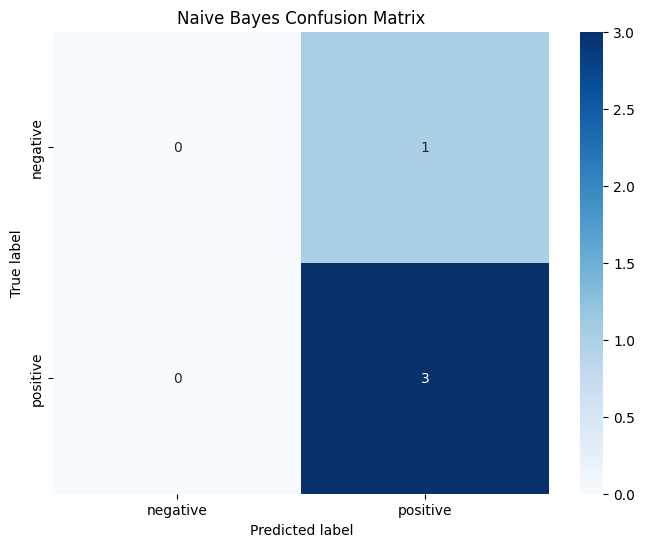

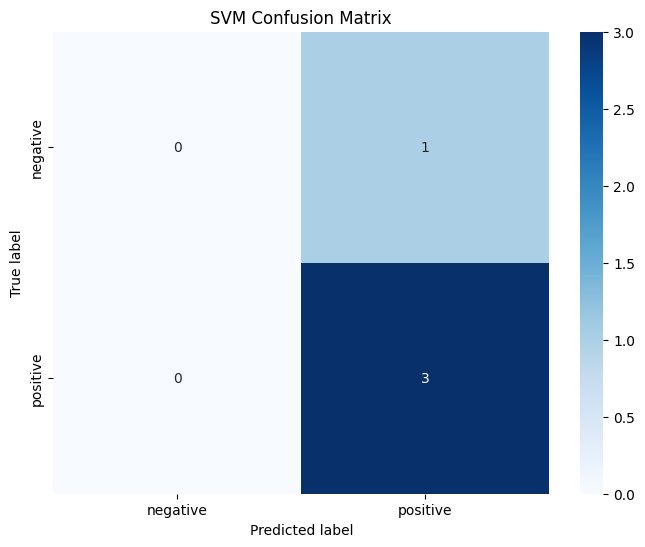

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')
